## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading Dataset

In [2]:
df = pd.read_csv('bank_customer_survey.csv')

In [3]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47          blue  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  y  
0  unknown    5   may       261         1     -1         0  unknown  0  
1  unknown    5   may       151         1     -1         0  unknown  0  
2  unknown    5   may        76         1     -1         0  unknown  0  
3  unknown    5   may        92         1     -1         0  unknown  0  
4  unknown    5   may       198         1     -1         0  unknown  0

### Dataset Exploration


### Shape of the data

In [4]:
rows_count, columns_count = df.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 45211
Total Number of columns : 17


## Below we can see the features involved in the data

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### Describing Data  
The standard deviation of balance, duration and pdays is greater than one third of the mean, distrubution would be spreaded out around the mean, we will see this in visualisation section.

In [6]:
df_transpose = df.describe().T
df_transpose

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   
y         45211.0     0.116985     0.321406     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0  
y              1.0

### Five point summary

In [7]:
df_transpose[['min', '25%', '50%', '75%', 'max']]

min    25%    50%     75%       max
age         18.0   33.0   39.0    48.0      95.0
balance  -8019.0   72.0  448.0  1428.0  102127.0
day          1.0    8.0   16.0    21.0      31.0
duration     0.0  103.0  180.0   319.0    4918.0
campaign     1.0    1.0    2.0     3.0      63.0
pdays       -1.0   -1.0   -1.0    -1.0     871.0
previous     0.0    0.0    0.0     0.0     275.0
y            0.0    0.0    0.0     0.0       1.0

### Lets See if there is any Null Values
There is no null value in the data

In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
df.isnull().values.any()

False

### Sometimes we see '?' as null value, So lets just check it.

In [10]:
for value in df.columns:
     print(value,":", sum(df[value] == '?'))

age : 0
job : 0
marital : 0
education : 0
default : 0
balance : 0
housing : 0
loan : 0
contact : 0
day : 0
month : 0
duration : 0
campaign : 0
pdays : 0
previous : 0
poutcome : 0
y : 0


### Data types involved in the data

In [11]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


### Converting Object to category

In [13]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  int64   
dtypes: category(9), int64(8)
memory usage: 3.1 MB


### Restructuring Data and encoding to numbers

In [15]:
replaceStruct = {
                "job" :      {"unknown": -1, "blue": 1, "management":2 , "technician": 3, "admin": 4,"services": 5, 
                         "retired": 6, "self": 7, "entrepreneur": 8, "unemployed": 9, "housemaid": 10,
                         "student": 11},
                "marital":   {"single": 1, "married": 2 ,"divorced": 3},
                "education": {"unknown":-1, "primary": 1, "secondary": 2 ,"tertiary": 3},
                "default":   {"no": 0, "yes": 1},
                "housing":   {"no": 0, "yes": 1},
                "loan":      {"no": 0, "yes": 1},
                "contact":   {"unknown": -1 , "cellular": 1, "telephone": 2},
                "month":     {"jan": 1, "feb":2 , "mar": 3, "apr": 4,"may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12},
                "poutcome":  {"unknown": -1, "failure": 0, "success": 1, "other": 2},
                "Target":    {"no": 0, "yes": 1} 
                    }

df=df.replace(replaceStruct)
df.head(3)

age job marital education default  balance housing loan contact  day month  \
0   58   2       2         3       0     2143       1    0      -1    5     5   
1   44   3       1         2       0       29       1    0      -1    5     5   
2   33   8       2         2       0        2       1    1      -1    5     5   

   duration  campaign  pdays  previous poutcome  y  
0       261         1     -1         0       -1  0  
1       151         1     -1         0       -1  0  
2        76         1     -1         0       -1  0

## Corelation of all other features with the outcome

In [16]:
df[['job', 'y']].groupby("job").mean().reset_index()

job         y
0    4  0.122027
1    1  0.072750
2    8  0.082717
3   10  0.087903
4    2  0.137556
5    6  0.227915
6    7  0.118429
7    5  0.088830
8   11  0.286780
9    3  0.110570
10   9  0.155027
11  -1  0.118056

<AxesSubplot: >

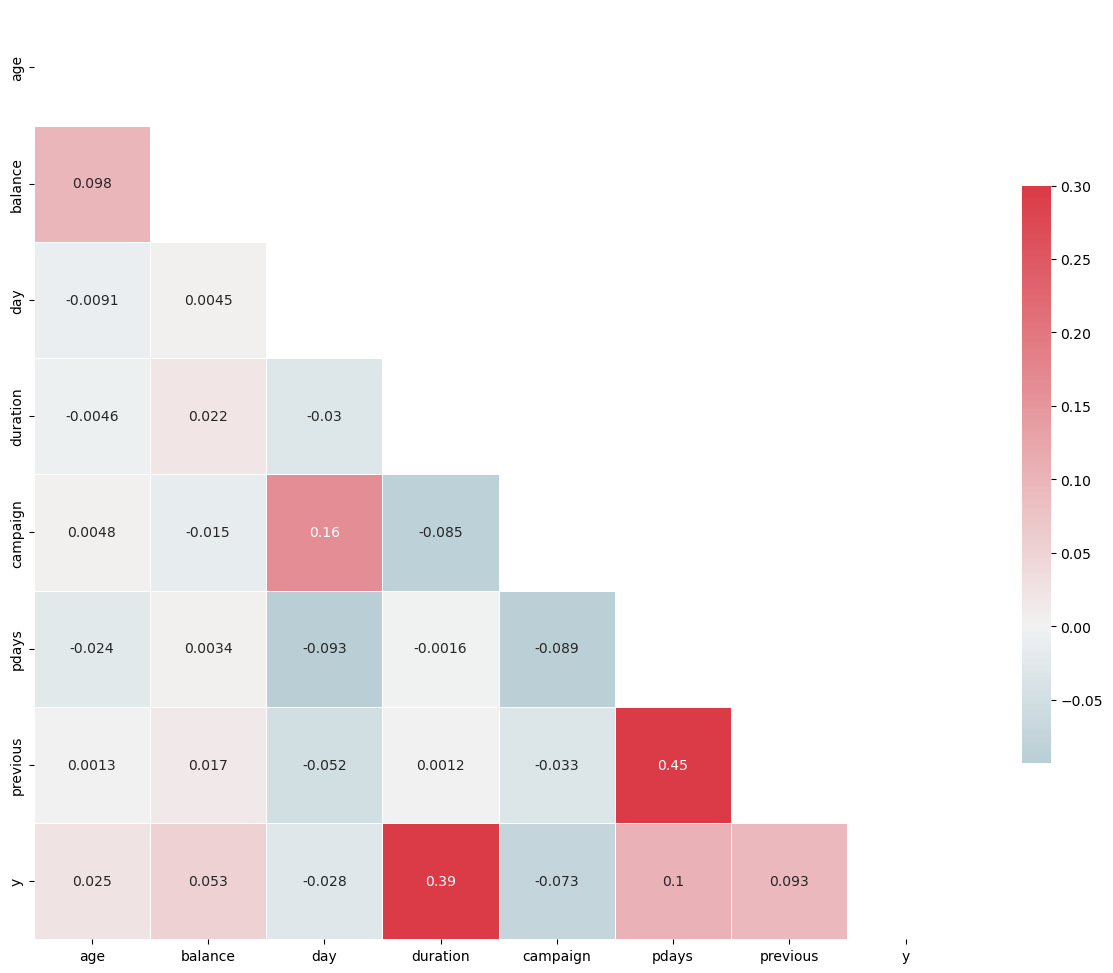

In [17]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

<AxesSubplot: title={'center': 'Correlation of Attributes'}>

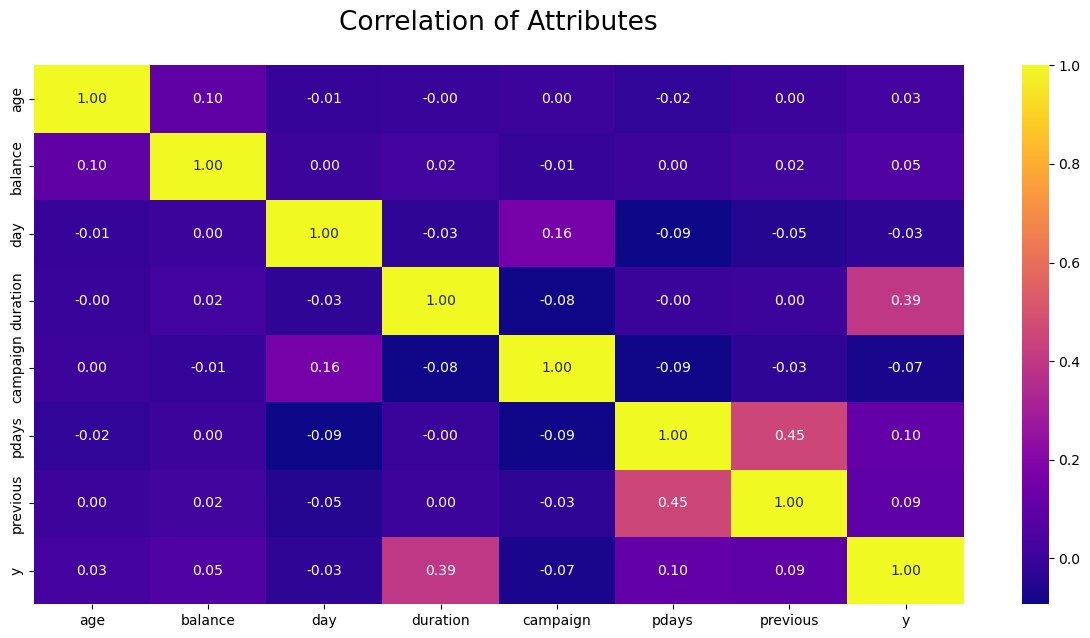

In [18]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df.corr(), cmap='plasma',annot=True, fmt='.2f')


- 'Campaign outcome' has a strong correlation with 'duration',
- A moderate correlation between 'Campaign outcome' and 'previous contacts'.
- Mild correlations between 'balance', 'month of contact' and 'number of campaign'.


### Checking Outliers

In [19]:
numeric = ['age','duration','campaign','pdays','previous']
cat = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']

for i in numeric:
    plt.figure(figsize=(2,3))
    fig = px.box(data_frame=df,x=i)
    fig.show();

<Figure size 200x300 with 0 Axes>

<Figure size 200x300 with 0 Axes>

<Figure size 200x300 with 0 Axes>

<Figure size 200x300 with 0 Axes>

<Figure size 200x300 with 0 Axes>

<AxesSubplot: >

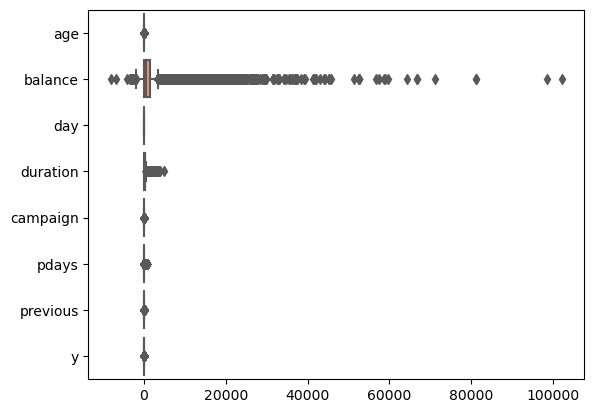

In [20]:
sns.boxplot(data=df, orient="h", palette="Set2", dodge=False)

<AxesSubplot: >

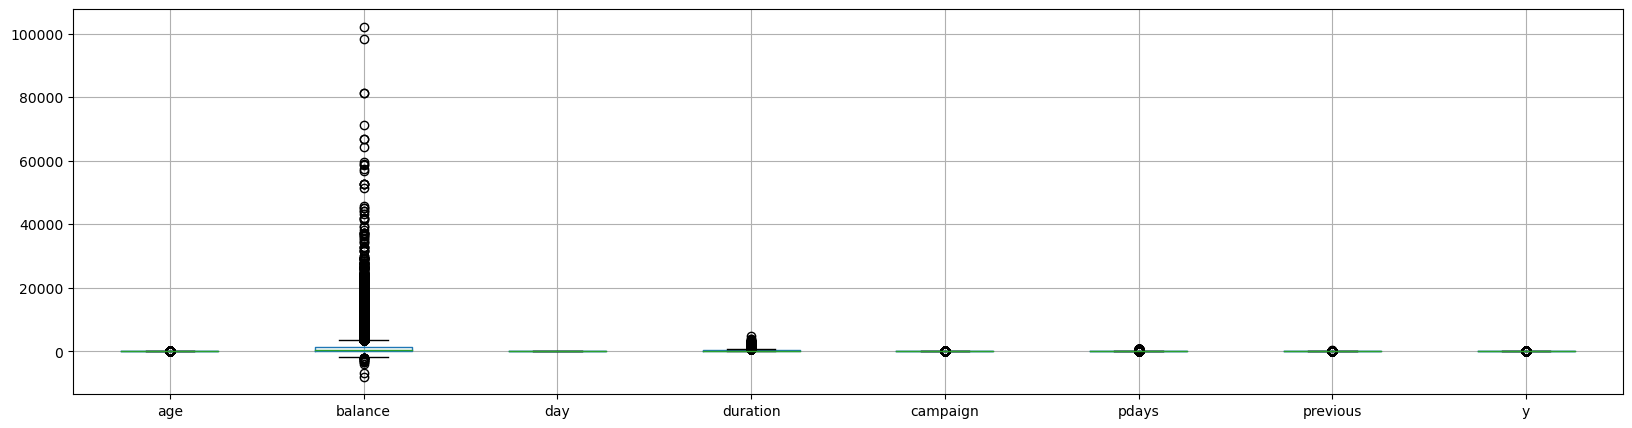

In [21]:
df.boxplot(return_type='axes', figsize=(20,5))

We can plainly see that there are outliers in the age, balance, length, campaign, pdays, and preceding columns. Using IQR, we will also discover the outliers. In this instance, outliers are defined as observations that fall below (Q1 1.5x IQR) or above (Q3 + 1.5x IQR) the boxplot lower whisker or upper whisker, respectively.

In [22]:
Q1 =  df['balance'].quantile(0.25) # 1º Quartile
Q3 =  df['balance'].quantile(0.75) # 3º Quartile
IQR = Q3 - Q1                      # Interquartile range
print('Interquartile range = ', IQR)
print('Numerber of outliers in balance column below the lower whisker :', df[df['balance'] < (Q1-(1.5*IQR))]['balance'].count())
print('Numerber of outliers above balance column the uper whisker  :', df[df['balance'] > (Q3+(1.5*IQR))]['balance'].count())

Interquartile range =  1356.0
Numerber of outliers in balance column below the lower whisker : 17
Numerber of outliers above balance column the uper whisker  : 4712


In [23]:
for i in df.describe().columns:
    Q1 = df.describe().at['25%', i]
    Q3 = df.describe().at['75%', i]
    IQR = Q3-Q1
    LTV = Q1 - 1.5 * IQR # lower bound 
    UTV = Q3 + 1.5 * IQR # upper bound
    print('Column Name                                         :', i)
    print('Interquartile range IQR                             :', IQR)
    print('Numerber of outliers below the lower whisker        :', df[df[i] < LTV][i].count())
    print('Numerber of outliers above the upper whisker         :', df[df[i] > UTV][i].count())
    print('Total Numbers of Ourliers                           :', (df[df[i] < LTV][i].count()) + (df[df[i] > UTV][i].count()))
    
    print('\n')

Column Name                                         : age
Interquartile range IQR                             : 15.0
Numerber of outliers below the lower whisker        : 0
Numerber of outliers above the upper whisker         : 487
Total Numbers of Ourliers                           : 487


Column Name                                         : balance
Interquartile range IQR                             : 1356.0
Numerber of outliers below the lower whisker        : 17
Numerber of outliers above the upper whisker         : 4712
Total Numbers of Ourliers                           : 4729


Column Name                                         : day
Interquartile range IQR                             : 13.0
Numerber of outliers below the lower whisker        : 0
Numerber of outliers above the upper whisker         : 0
Total Numbers of Ourliers                           : 0


Column Name                                         : duration
Interquartile range IQR                             : 21

## Outlier Removal


In [24]:
from collections import Counter
def detect_outliers(data,features):
    outlier_indices = []
    for c in features:
        # 1st quartile
        Q1 = np.percentile(data[c],25)
        # 3rd quartile
        Q3 = np.percentile(data[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [25]:
indexes = df.loc[detect_outliers(df,['age','duration','campaign','previous'])]
indexes.index.tolist()

[40363,
 40957,
 41610,
 41754,
 41842,
 42061,
 42325,
 42419,
 42558,
 42607,
 42730,
 42859,
 42891,
 42996,
 43142,
 43158,
 43423,
 43532,
 43722,
 43731,
 43775,
 43832,
 43893,
 44109,
 44262,
 44316,
 44634,
 44746,
 44752,
 44788,
 45208,
 27553,
 29720,
 36443,
 36967,
 38725,
 45056]

In [26]:
df = df.drop(indexes.index.tolist(), axis=0).reset_index(drop=True)

In [27]:
df.head()

age job marital education default  balance housing loan contact  day month  \
0   58   2       2         3       0     2143       1    0      -1    5     5   
1   44   3       1         2       0       29       1    0      -1    5     5   
2   33   8       2         2       0        2       1    1      -1    5     5   
3   47   1       2        -1       0     1506       1    0      -1    5     5   
4   33  -1       1        -1       0        1       0    0      -1    5     5   

   duration  campaign  pdays  previous poutcome  y  
0       261         1     -1         0       -1  0  
1       151         1     -1         0       -1  0  
2        76         1     -1         0       -1  0  
3        92         1     -1         0       -1  0  
4       198         1     -1         0       -1  0

### Pairplot

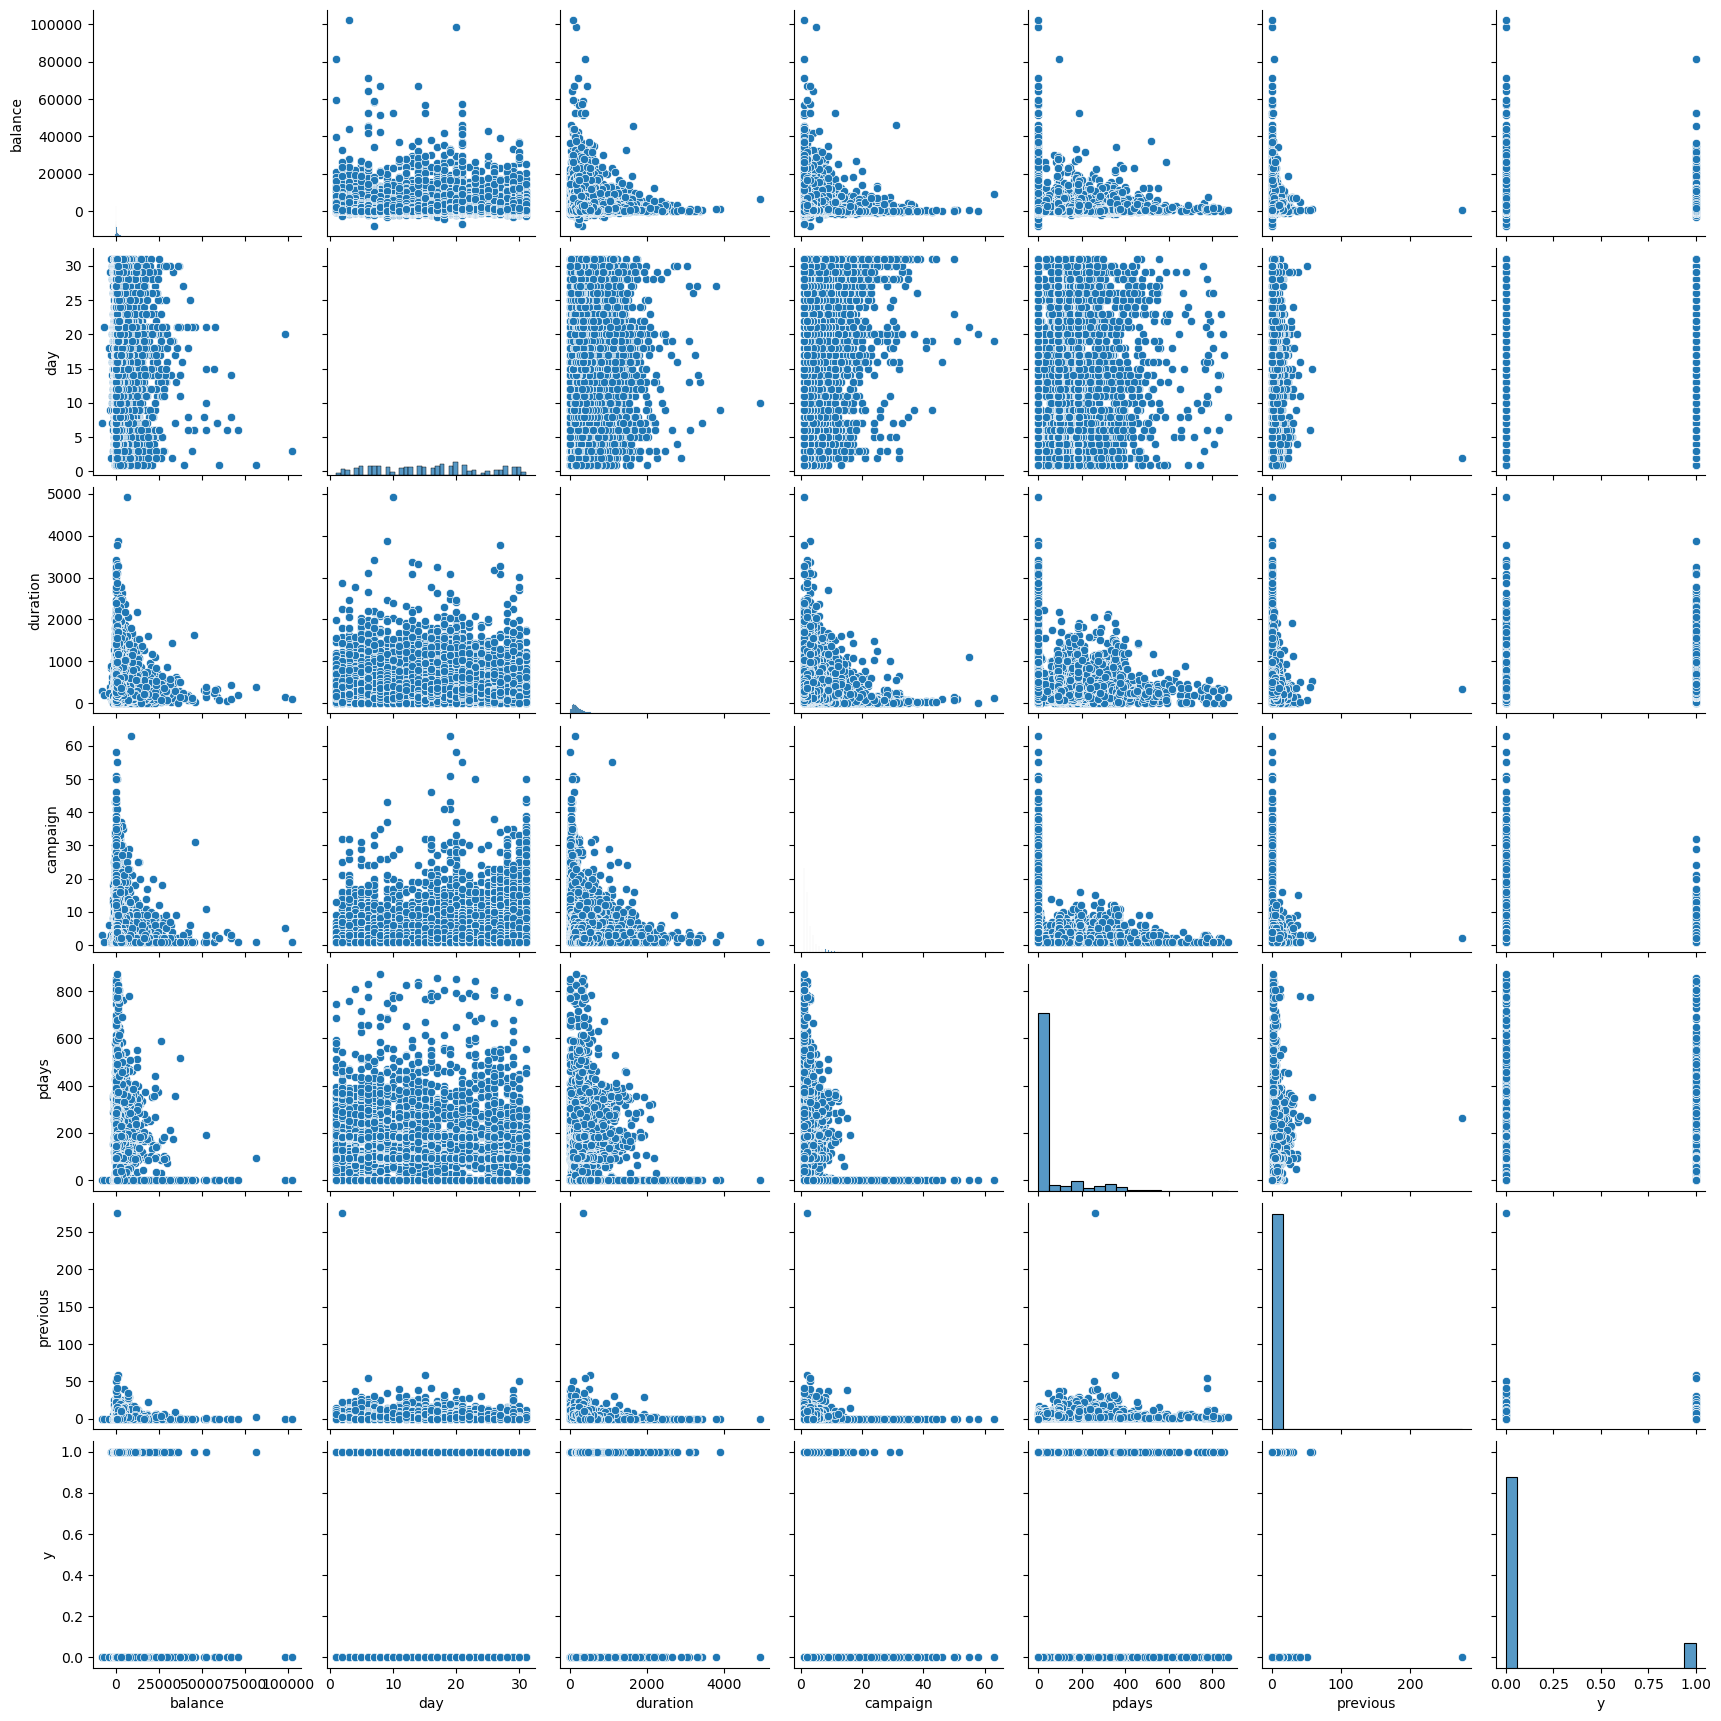

In [28]:
sns.pairplot(df.iloc[:,1:])

### Ratio of subscribers and non-subscribers
39922 of the 45211 data points have the label "no," whereas 5289 have the label "yes." The percentage of customers who did not subscribe is noticeably higher than the percentage of customers who did.

In [29]:
subscriber_counts = pd.DataFrame(df["y"].value_counts()).reset_index()
subscriber_counts.columns =["Labels","Target"]
subscriber_counts

Labels  Target
0       0   39909
1       1    5265

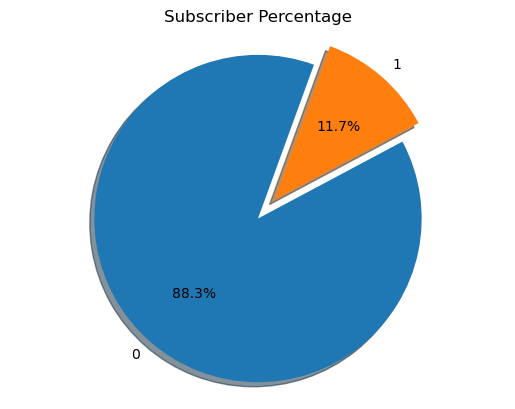

In [30]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(subscriber_counts["Target"], explode=explode, labels=subscriber_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')
plt.title("Subscriber Percentage")
plt.show()

### Distribution of Age
We can see from the information above that the bank has phoned individuals ranging in age from 18 to 95. The bulk of the clients that phoned were, however, in their 30s to 40s. The age distribution is more normally distributed, with a lower standard deviation. The age group of 30 to 40 years old has a higher subscription rate as well.

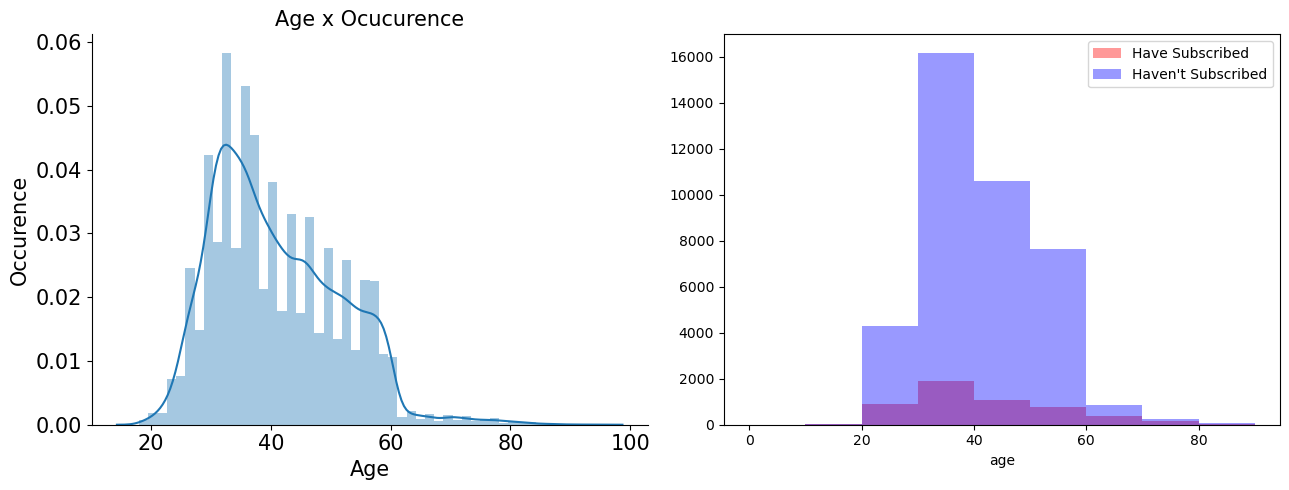

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))

sns.distplot(df['age'], ax = ax1)
sns.despine(ax = ax1)
ax1.set_xlabel('Age', fontsize=15)
ax1.set_ylabel('Occurence', fontsize=15)
ax1.set_title('Age x Ocucurence', fontsize=15)
ax1.tick_params(labelsize=15)

#Age group
bins = range(0, 100, 10)
ax2 = sns.distplot(df.age[df.y==1], color='red', kde=False, bins=bins, label='Have Subscribed')
sns.distplot(df.age[df.y==0], ax=ax2,  
         color='blue', kde=False, bins=bins, label="Haven't Subscribed")
plt.legend()

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### Job Distribution
The compensation for managers and technicians is likewise relatively substantial when compared to that of other job holders. Very few students attend. For students and retired customers, the subscription rate (ratio) is higher.

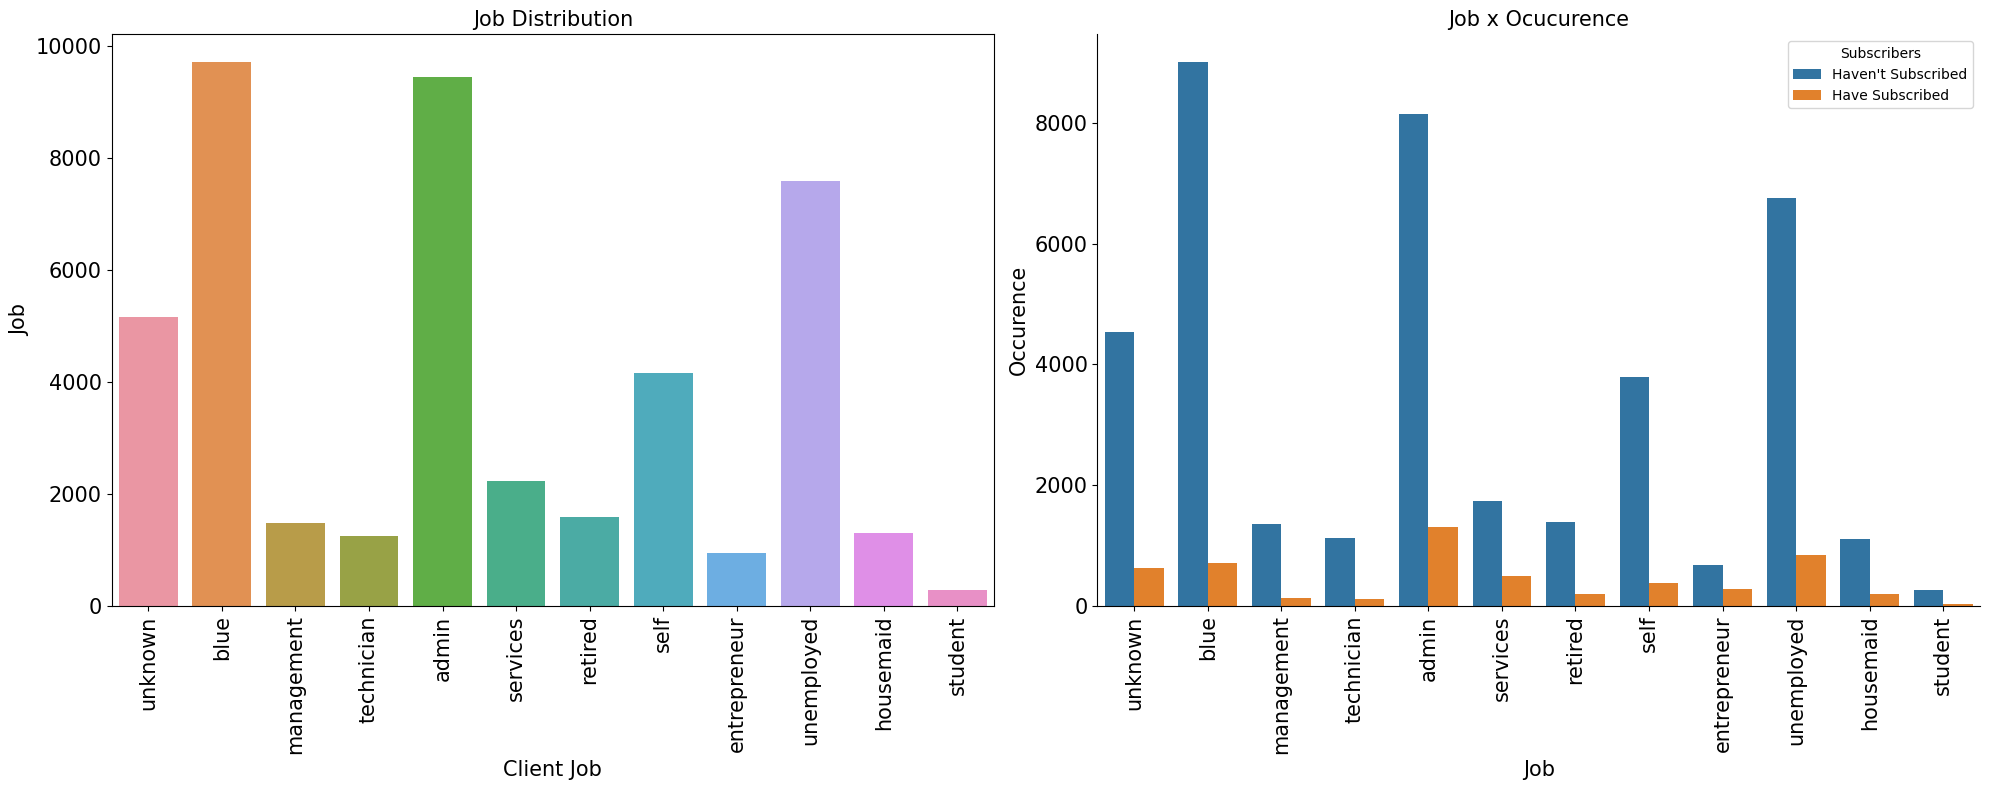

In [32]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20, 8)

sns.countplot(x = 'job', data = df, ax = ax1, )
ax1.set_xlabel('Client Job', fontsize=15)
ax1.set_ylabel('Job', fontsize=15)
ax1.set_title('Job Distribution', fontsize=15)
ax1.tick_params(labelsize=15)
ax1.set_xticklabels(replaceStruct['job'], rotation=90)

sns.countplot(x=df['job'], data = df, hue = 'y', ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Job', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Job x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)
ax2.set_xticklabels(replaceStruct['job'], rotation=90)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.legend(title='Subscribers', labels=["Haven't Subscribed", 'Have Subscribed'])

### Marital Distribution
In our dataset, the proportion of married clients is relatively high. Among the clientele who are single, the subscription ratio for term deposits is good here.

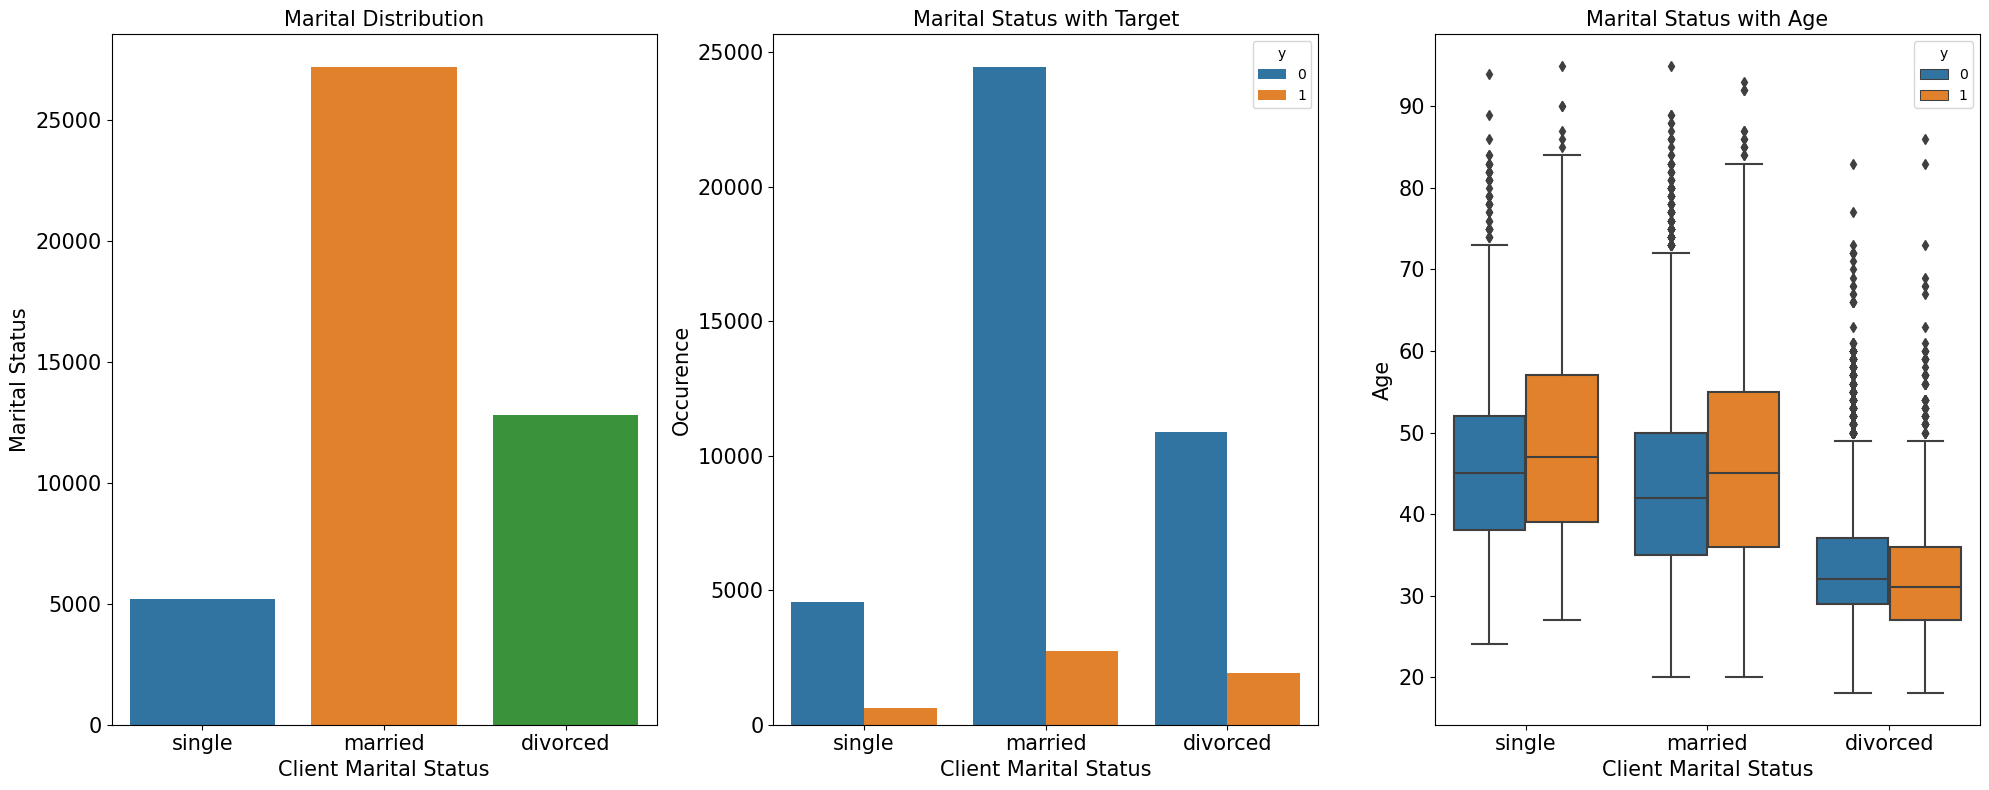

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 4))
fig.set_size_inches(20, 8)

sns.countplot(x = 'marital', data = df, ax = ax1)
ax1.set_xlabel('Client Marital Status', fontsize=15)
ax1.set_ylabel('Marital Status', fontsize=15)
ax1.set_title('Marital Distribution', fontsize=15)
ax1.set_xticklabels(replaceStruct['marital'])
ax1.tick_params(labelsize=15)

sns.countplot(x=df['marital'], data = df, hue = 'y', ax = ax2)
ax2.set_xlabel('Client Marital Status', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Marital Status with Target', fontsize=15)
ax2.set_xticklabels(replaceStruct['marital'])
ax2.tick_params(labelsize=15)

sns.boxplot(x="marital", y='age', hue="y", data=df, ax=ax3)
ax3.set_xlabel('Client Marital Status', fontsize=15)
ax3.set_ylabel('Age', fontsize=15)
ax3.set_title('Marital Status with Age', fontsize=15)
ax3.set_xticklabels(replaceStruct['marital'])
ax3.tick_params(labelsize=15)

ax3.set_xticklabels(replaceStruct['marital'])
plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### Education Distribution
In comparison to other education levels, the number of clients with a "secondary" level of education is relatively high. Moreover, customers with secondary and tertiary education levels are more likely to sign up for term deposits.

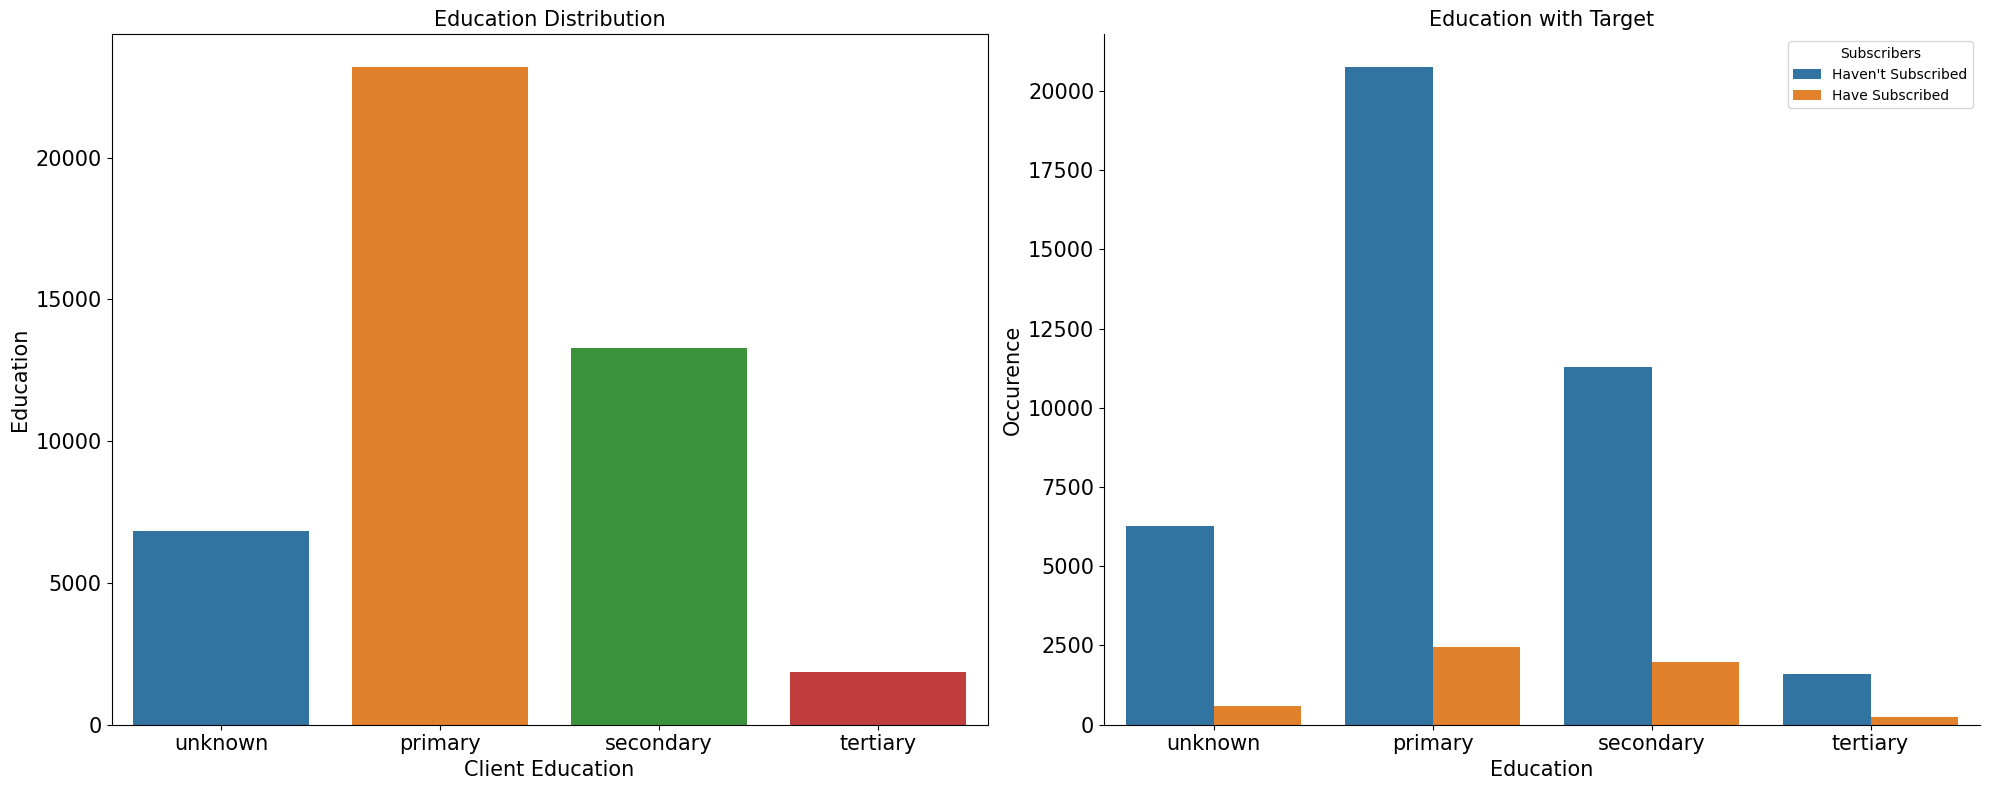

In [34]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20, 8)

sns.countplot(x = 'education', data = df, ax = ax1)
ax1.set_xlabel('Client Education', fontsize=15)
ax1.set_ylabel('Education', fontsize=15)
ax1.set_title('Education Distribution', fontsize=15)
ax1.set_xticklabels(replaceStruct['education'])
ax1.tick_params(labelsize=15)


sns.countplot(x=df['education'], data = df, hue = 'y', ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Education', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Education with Target', fontsize=15)
ax2.set_xticklabels(replaceStruct['education'])
ax2.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.legend(title='Subscribers', labels=["Haven't Subscribed", 'Have Subscribed'])

### Balance Distribution
We can observe from the graph above that the balance column has a long tail to the right, which would be the outliers. The subscribers are consumers with yearly balances of between 1 and 10,000 euros.

Text(0.5, 1.0, 'balance Distribution')

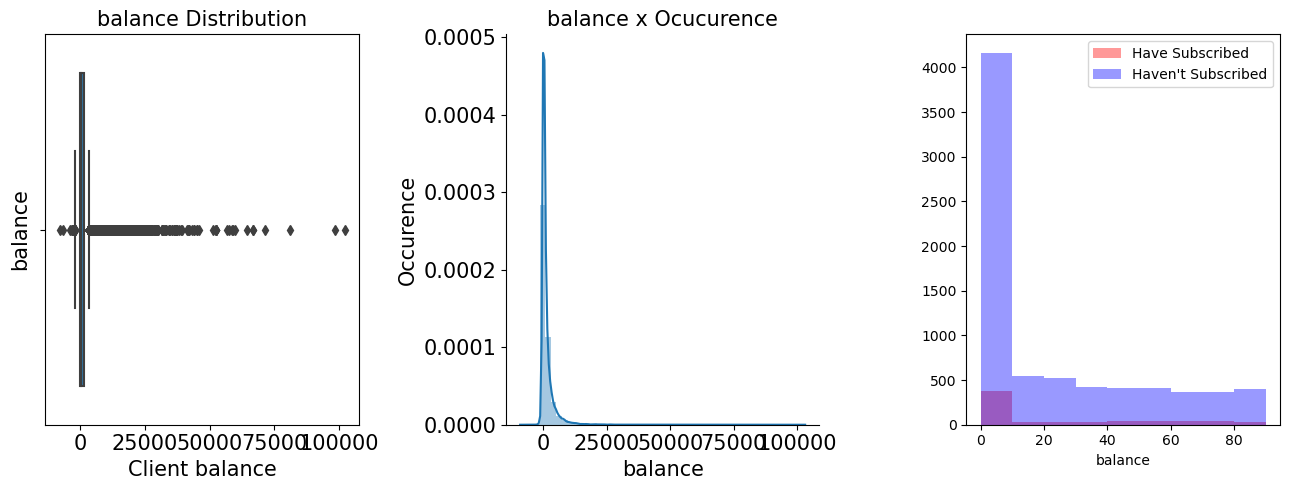

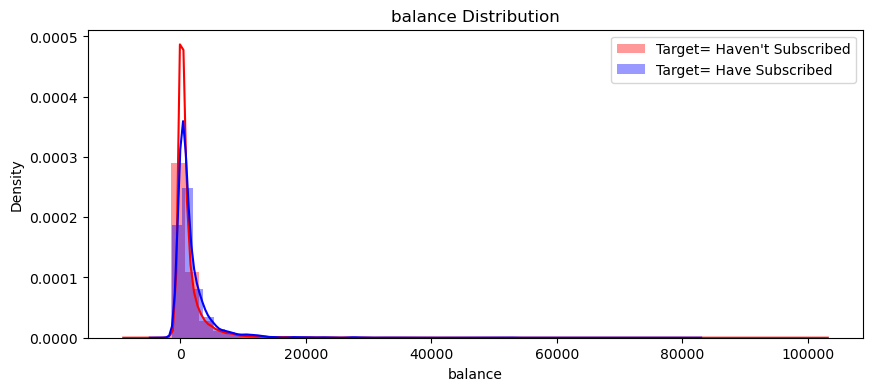

In [35]:
fig, (ax1, ax2, x3) = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 5))
sns.boxplot(x = 'balance', data = df, orient = 'v', ax = ax1)
ax1.set_xlabel('Client balance', fontsize=15)
ax1.set_ylabel('balance', fontsize=15)
ax1.set_title('balance Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df['balance'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('balance', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('balance x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

bins = range(0, 100, 10)
ax3 = sns.distplot(df.balance[df.y==1], color='red', kde=False, bins=bins, label='Have Subscribed')
sns.distplot(df.balance[df.y==0], ax=ax3, color='blue', kde=False, bins=bins, label="Haven't Subscribed")
plt.legend()

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

plt.figure(figsize=(10,4))
sns.distplot(df[df["y"] == 0]['balance'], color = 'r',label="Target= Haven't Subscribed")
sns.distplot(df[df["y"] == 1]['balance'], color = 'b',label='Target= Have Subscribed')
plt.legend()
plt.title("balance Distribution")

### DEFAULT, HOUSING, LOAN Distribution
- The majority of customers do not currently have credit cards, and those without credit cards also make up a large portion of the subscriber base.
- The majority of consumers have mortgages, while those who do not have mortgages are more likely to sign up for term deposits.
- The majority of customers do not have personal loans, and the proportion of subscribers with and without personal loans is about equal.

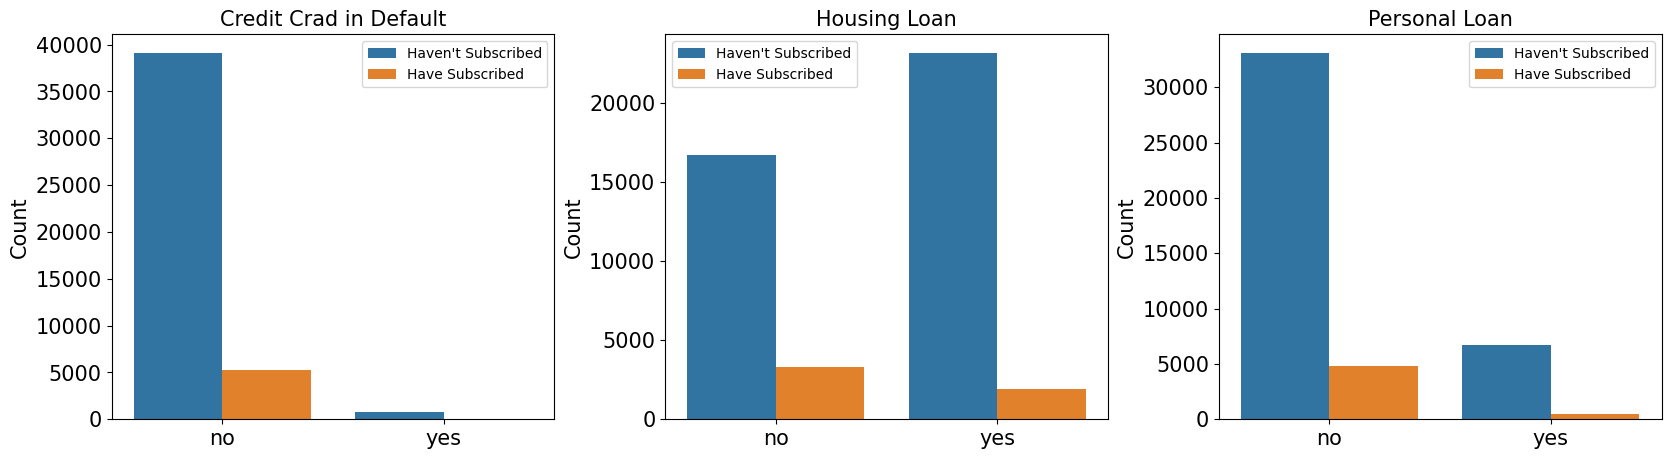

In [36]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))
sns.countplot(x = 'default', data = df, hue='y', ax = ax1)
ax1.set_title('Credit Crad in Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)
ax1.set_xticklabels(replaceStruct['default'])
ax1.legend(["Haven't Subscribed", "Have Subscribed"])
# Housing, has housing loan ?
sns.countplot(x = 'housing', data = df,  hue='y', ax = ax2)
ax2.set_title('Housing Loan', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)
ax2.set_xticklabels(replaceStruct['housing'])
ax2.legend(["Haven't Subscribed", "Have Subscribed"])

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = df,  hue='y', ax = ax3)
ax3.set_title('Personal Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)
ax3.set_xticklabels(replaceStruct['loan'])
ax3.legend(["Haven't Subscribed", "Have Subscribed"])

plt.subplots_adjust(wspace=0.25)

### Contact Distribution
Most of the consumers have received calls on their mobile devices. Also, as far as I'm aware, the model-building process will not be much impacted by the contact communication type because there is no relevant connection between this sort of contact and a bank. I'll be removing the building model for "Contact."

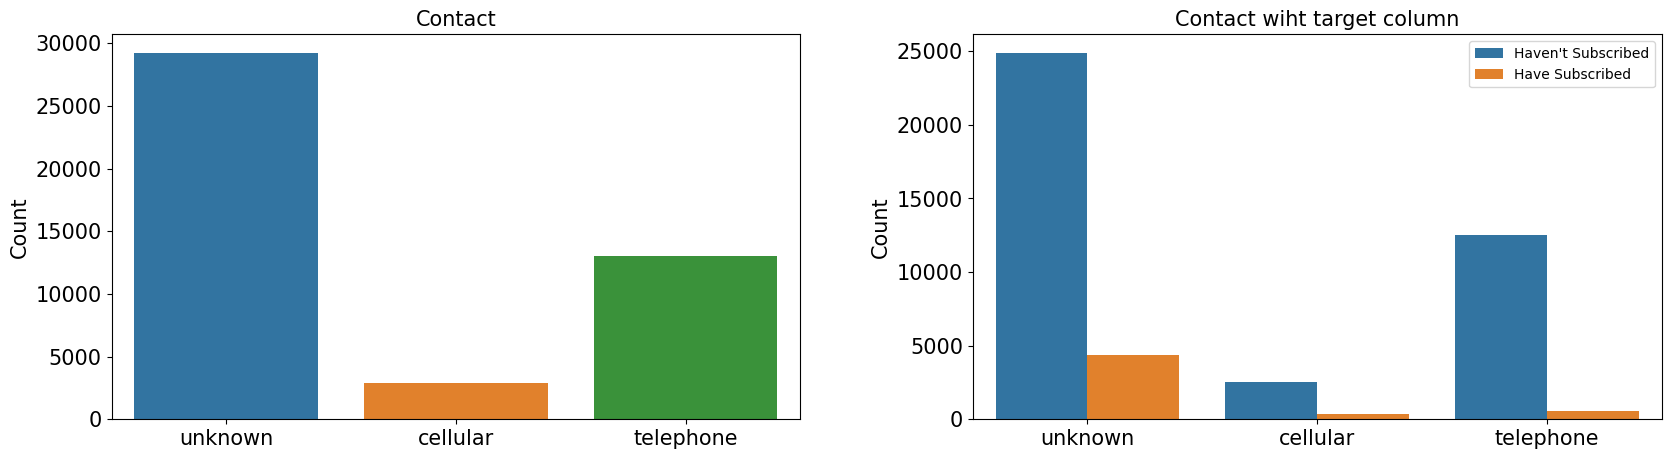

In [37]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

sns.countplot(x = 'contact', data = df,  ax = ax1)
ax1.set_title('Contact', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.set_xticklabels(replaceStruct['contact'])
ax1.tick_params(labelsize=15)

sns.countplot(x = 'contact', data = df, hue='y', ax = ax2)
ax2.set_title('Contact wiht target column', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)
ax2.set_xticklabels(replaceStruct['contact'])
ax2.legend(["Haven't Subscribed", "Have Subscribed"])
plt.subplots_adjust(wspace=0.25)

## Splitting Data

In [38]:
from sklearn.model_selection import train_test_split
X = df.drop('y', axis=1)
y = df[['y']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (31621, 16)
y train data (31621, 1)
x test data  (13553, 16)
y test data  (13553, 1)


In [39]:
X_train.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
dtype: bool

## Scaling the Data

In [40]:
from sklearn import preprocessing

X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

X_train = X_train_scaled
X_test  = X_test_scaled

In [41]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10)

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn import metrics

LogReg = LogisticRegression(solver = 'lbfgs')
LogReg.fit(X_train, y_train.values.ravel())

# Predicting for test set
LogReg_y_pred               = LogReg.predict(X_test)
LogReg_Score                = LogReg.score(X_test, y_test)

LogReg_ScoreAccuracy        = accuracy_score(y_test, LogReg_y_pred)

LogReg_PrecisonScore        = precision_score(y_test, LogReg_y_pred)
LogReg_RecollScore          = recall_score(y_test, LogReg_y_pred)
LogReg_F1                   = f1_score(y_test, LogReg_y_pred)

cross_validation_result = model_selection.cross_val_score(LogReg, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')

base_model_results = pd.DataFrame([['Logistic Regression', LogReg_ScoreAccuracy, LogReg_PrecisonScore,
                                LogReg_RecollScore, LogReg_F1, cross_validation_result.mean(), cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])

print('\nLogistic Regression classification Report : \n',metrics.classification_report(y_test, LogReg_y_pred))


Logistic Regression classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11936
           1       0.62      0.22      0.33      1617

    accuracy                           0.89     13553
   macro avg       0.76      0.60      0.63     13553
weighted avg       0.87      0.89      0.87     13553



## K-Nearest Neighbors

In [43]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=9, weights = 'uniform', metric='euclidean')
Knn.fit(X_train, y_train.values.ravel())

# Predicting for test set
Knn_y_pred               = Knn.predict(X_test)
Knn_Score                = Knn.score(X_test, y_test)

Knn_ScoreAccuracy        = accuracy_score(y_test, Knn_y_pred)
Knn_PrecisonScore        = precision_score(y_test, Knn_y_pred)
Knn_RecollScore          = recall_score(y_test, Knn_y_pred)
Knn_F1                   = f1_score(y_test, Knn_y_pred)

cross_validation_result = model_selection.cross_val_score(Knn, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')
knn_models_results = pd.DataFrame([['K-Nearest Neighbors', Knn_ScoreAccuracy, Knn_PrecisonScore,
                                Knn_RecollScore, Knn_F1, cross_validation_result.mean(), cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
base_model_results = base_model_results.append(knn_models_results, ignore_index = True)

print('\nK-Nearest Neighbors (K-NN) classification Report : \n',metrics.classification_report(y_test, Knn_y_pred))


K-Nearest Neighbors (K-NN) classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     11936
           1       0.64      0.33      0.44      1617

    accuracy                           0.90     13553
   macro avg       0.78      0.65      0.69     13553
weighted avg       0.88      0.90      0.88     13553

